In [1]:
# Transformed Sample code for active noise cancellation from ECG signals from Matlab
#
# Matlab Code: Reza Sameni (C)
# Email: rsameni@shirazu.ac.ir
# Web: www.sameni.info
#
# Created May 2007
# Modified June 2018
#
# Transformed by: Ava Mehri
# amehri2@uic.edu
# May 2021


In [2]:
import scipy.io as sio
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def AdaptiveFilter(x, delay, taps, mu):
  xref = np.append(np.zeros((delay+taps-1,1)), x[0:-delay])
  w = np.ones((taps,1))
  n = np.zeros((len(x),1))
  e = np.zeros((len(x),1))
  for i in range(len(x)):
    if i > taps-2:
      xr = xref[i-taps+1:i+1][::-1]
    else:
      xr = np.append(xref[0:i+1][::-1], np.zeros((taps-i-1,1)))

    n[i] = np.dot(xr, w)
    e[i] = x[i] - n[i]
    w = w + 2* mu * e[i] * xr.reshape(5,1)

  return e, n

In [4]:
data = sio.loadmat('SampleECG128Hz.mat')

In [5]:
y = data['y']

In [6]:
fs = 128
ECG = y[:,1]
N = len(ECG)
L = np.arange(0,N,1)

In [7]:
rr = 0.1

In [8]:
x = ECG + 1.21*np.sin(2*(np.pi)*50*L/fs) + rr*np.random.normal(size=N)

In [9]:
delay = 3
taps = 5
mu = 0.005

In [10]:
ECG_estimate, Noise_estimate = AdaptiveFilter(x, delay, taps, mu)

In [11]:
I = np.arange(math.floor(2*len(ECG)/4),math.ceil(3*len(ECG)/4)+1,1)

In [12]:
SignalPower = np.mean(np.power(ECG[I],2))

In [13]:
PreNoisePower = np.mean(np.power(x[I]-ECG[I],2))

In [14]:
PostNoisePower = np.mean(np.power(ECG[I]-ECG_estimate[I],2))

In [15]:
Initial_SNR = 10*np.log10(SignalPower / PreNoisePower)
AF_SNR = 10*np.log10(SignalPower / PostNoisePower)

In [21]:
Initial_SNR

-3.9266794467020416

In [17]:
AF_SNR

-3.3004635256528925

In [18]:
t = L/fs

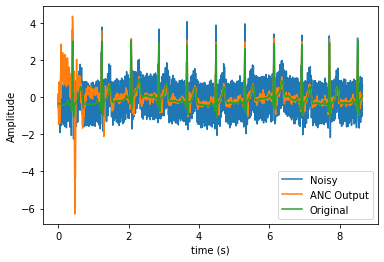

In [19]:
plt.figure()
plt.plot(t,x, label='Noisy')
plt.plot(t, ECG_estimate, label='ANC Output')
plt.plot(t, ECG, label='Original')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

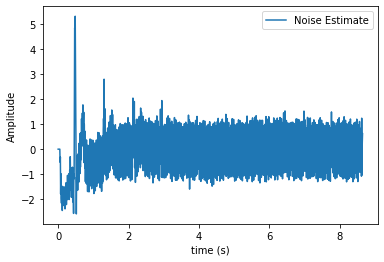

In [20]:
plt.figure()
plt.plot(t,Noise_estimate, label='Noise Estimate')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()